In [1]:
from skimage import io

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

In [5]:
stockholm = io.imread('stockholm.JPG')

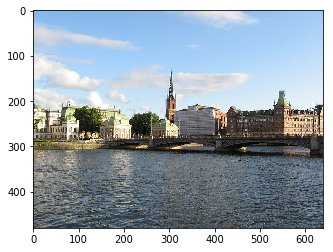

In [6]:
plt.imshow(stockholm)

In [8]:
def img2pd(image):
    image_df = pd.DataFrame()
    for number, color in enumerate(['r', 'g', 'b']):
        image_df[color] = np.ravel(image[:,:,number])
    return image_df

In [9]:
stockholm_df = img2pd(stockholm)

In [10]:
stockholm_df.head(10)

,r,g,b
0,126,173,227
1,127,174,228
2,127,174,228
3,125,175,228
4,126,176,229
5,126,176,229
6,125,176,229
7,125,176,229
8,122,178,229
9,125,178,230


In [11]:
def tupler(row):
    return (row['r'], row['g'], row['b'])

In [12]:
stockholm_df['color'] = stockholm_df.apply(tupler, axis = 1)

In [13]:
stockholm[0,0]

array([126, 173, 227], dtype=uint8)

In [16]:
stockholm_df['colorcount'] = stockholm_df.groupby('color')['color'].transform('size')

In [17]:
stockholm_df

,r,g,b,color,colorcount
0,126,173,227,"(126, 173, 227)",1
1,127,174,228,"(127, 174, 228)",3
2,127,174,228,"(127, 174, 228)",3
3,125,175,228,"(125, 175, 228)",2
4,126,176,229,"(126, 176, 229)",9
5,126,176,229,"(126, 176, 229)",9
6,125,176,229,"(125, 176, 229)",2
7,125,176,229,"(125, 176, 229)",2
8,122,178,229,"(122, 178, 229)",1
9,125,178,230,"(125, 178, 230)",1


In [25]:
stockholm_df.loc[stockholm_df['colorcount'] == 1, 'r'] = 255

In [26]:
stockholm_df.loc[stockholm_df['colorcount'] == 1, 'g'] = 0

In [27]:
stockholm_df.loc[stockholm_df['colorcount'] == 1, 'b'] = 255

In [31]:
channels = []
for channel in ['r', 'g', 'b']:
    x, y = stockholm.shape[0], stockholm.shape[1] 
    channel = stockholm_df[channel].values.reshape(x,y)
    channels.append(channel)
stockholm_magenta = np.stack(channels, axis = 2)

In [32]:
stockholm_magenta.shape

(480, 640, 3)

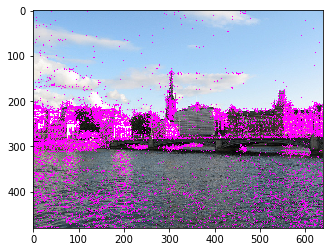

In [35]:
plt.imshow(stockholm_magenta)

In [ ]:
distances = [(np.sqrt((numbers[n][0]-point[0])*(numbers[n][0]-point[0]) 
                      + (numbers[n][1]-point[1])*(numbers[n][1]-point[1]) + 
                      (numbers[n][2]-point[2])*(numbers[n][2]-point[2])), numbers[n]) for n in range(len(numbers))]


for each pixel that has the color count == 1 calculate the distances from each of the colors in the "top" group, 
then set it's values to those values